In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("kaggle4/EEG_Eye_State_Classification.csv")

In [3]:
data.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [4]:
data.shape

(14980, 15)

In [5]:
data.describe

<bound method NDFrame.describe of            AF3       F7       F3      FC5       T7       P7       O1       O2  \
0      4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1      4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2      4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3      4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4      4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   
...        ...      ...      ...      ...      ...      ...      ...      ...   
14975  4281.03  3990.26  4245.64  4116.92  4333.85  4614.36  4074.87  4625.64   
14976  4276.92  3991.79  4245.13  4110.77  4332.82  4615.38  4073.33  4621.54   
14977  4277.44  3990.77  4246.67  4113.85  4333.33  4615.38  4072.82  4623.59   
14978  4284.62  3991.79  4251.28  4122.05  4334.36  4616.41  4080.51  4628.72   
14979  4287.69  3997.44  4260.00  4121.03  4333.33  4616.41  4088.72  4638.

In [6]:
data.dtypes

AF3             float64
F7              float64
F3              float64
FC5             float64
T7              float64
P7              float64
O1              float64
O2              float64
P8              float64
T8              float64
FC6             float64
F4              float64
F8              float64
AF4             float64
eyeDetection      int64
dtype: object

In [7]:
data.isnull().sum()

AF3             0
F7              0
F3              0
FC5             0
T7              0
P7              0
O1              0
O2              0
P8              0
T8              0
FC6             0
F4              0
F8              0
AF4             0
eyeDetection    0
dtype: int64

In [7]:
data.eyeDetection.value_counts()

0    8257
1    6723
Name: eyeDetection, dtype: int64

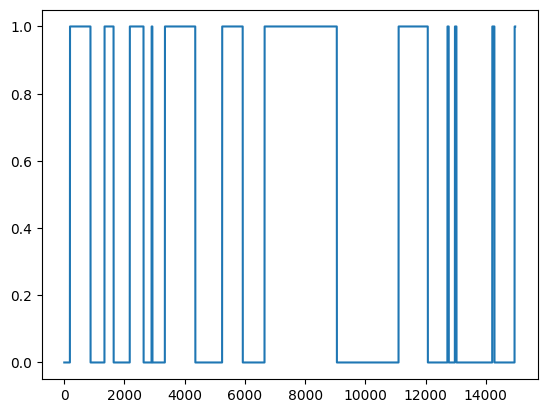

In [8]:
output = data["eyeDetection"]
plt.plot(output)

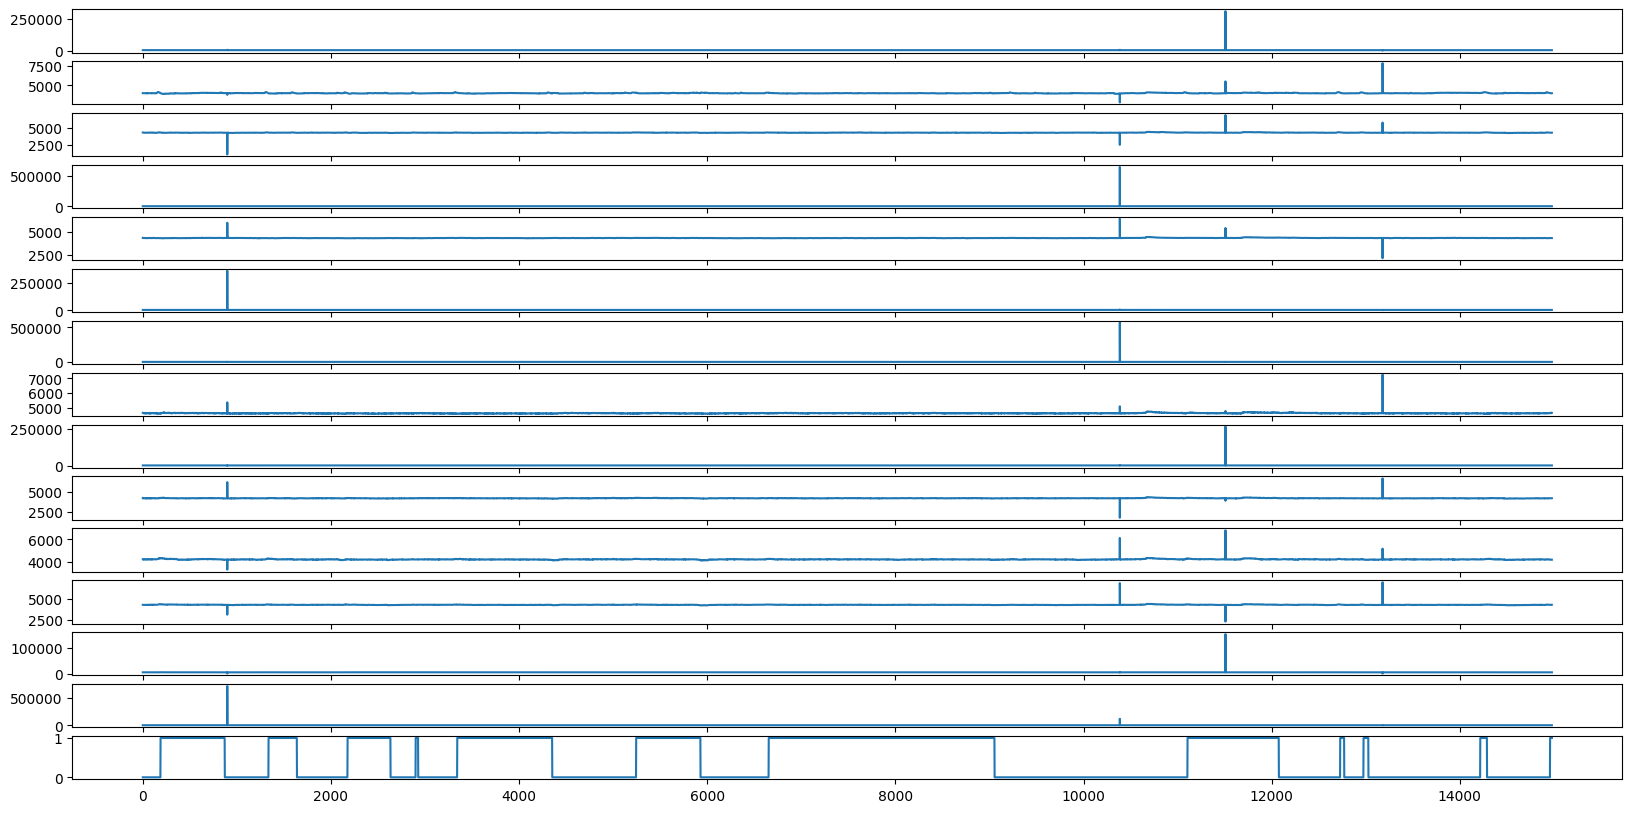

In [9]:
var = data.columns.to_list()

figure, axis = plt.subplots(15, 1, figsize=(20, 10))
i = 0
for item in var:
    axis[i].plot(data[item])
    i+=1

In [10]:
df = data.copy()

In [11]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [12]:
# for col in df.columns[:-1]:
#     plt.figure(figsize=(12, 3))
#     sns.lineplot(x=df.index, y=col, data=df, hue="eyeDetection")
#     plt.show()

In [13]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
df_ro = df[filtered_entries]
df_ro = df_ro.reset_index(drop=True)
df_ro.shape

(14976, 15)

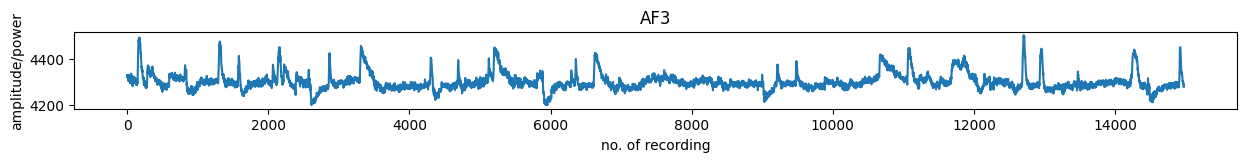

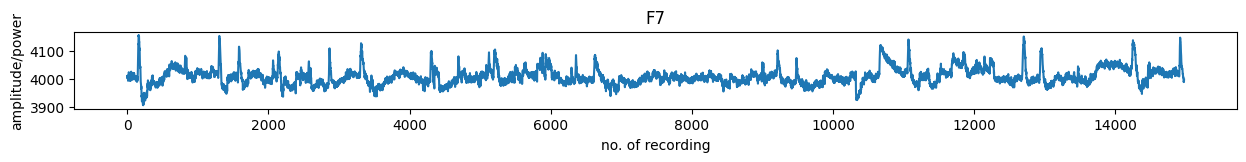

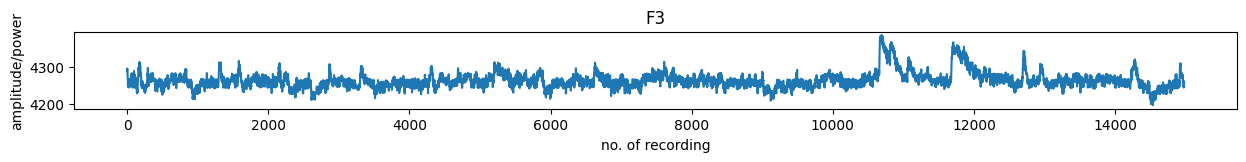

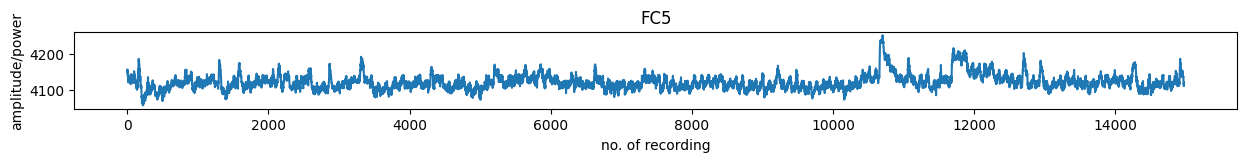

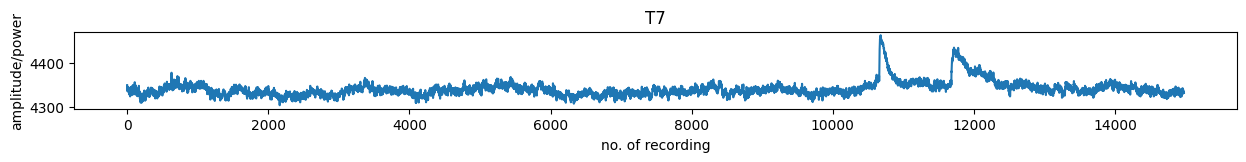

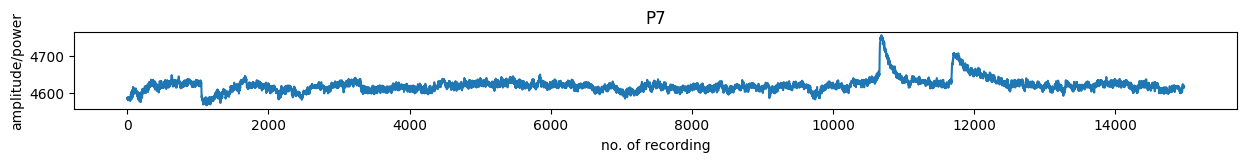

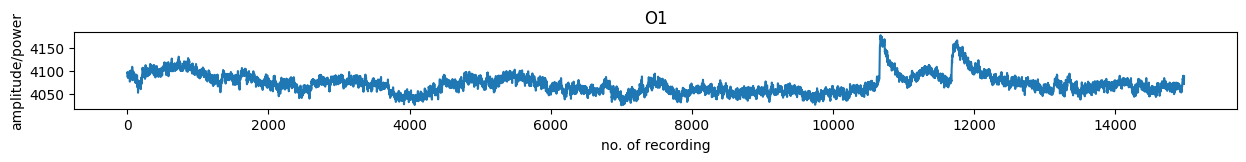

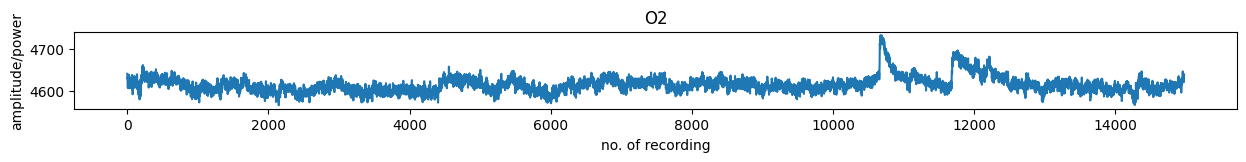

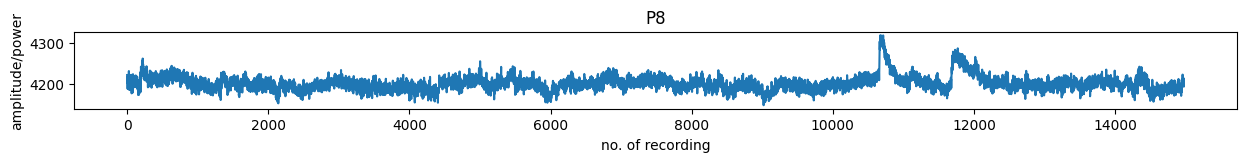

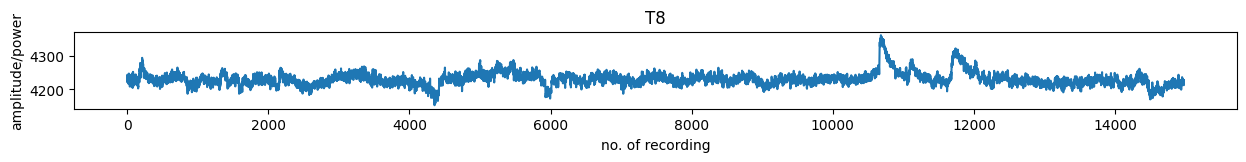

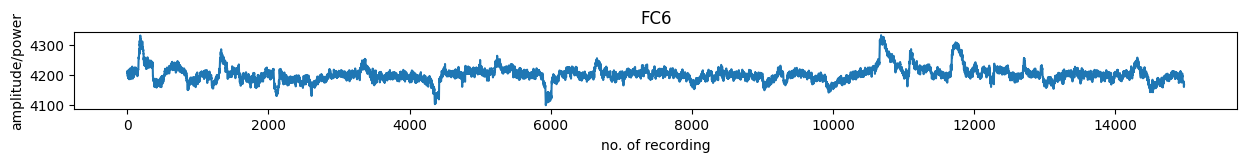

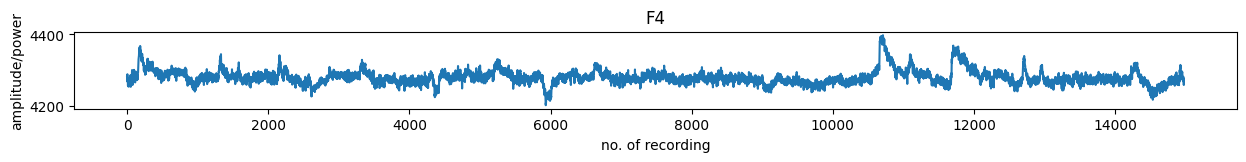

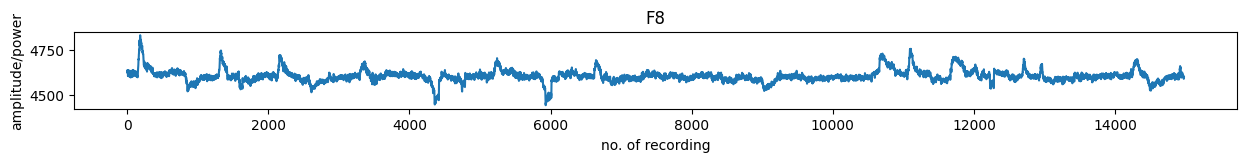

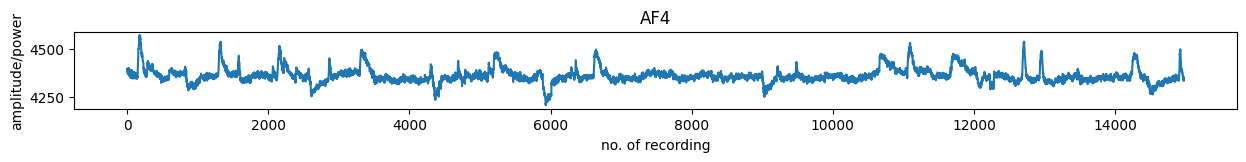

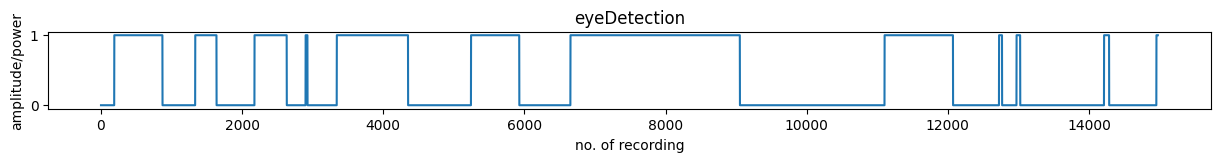

In [14]:
for f in df_ro.columns:
    df_ro[f].plot(figsize=(15, 1), title=f, ylabel="amplitude/power", xlabel="no. of recording")
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(df.drop("eyeDetection", axis=1), df["eyeDetection"], test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11984, 14), (2996, 14), (11984,), (2996,))

In [16]:
def model_func(model):
    # gitting the model
    model.fit(x_train, y_train)
    
    y_preds = model.predict(x_test)
    
    # print(y_preds)
    # print(y_test)
    return accuracy_score(y_test, y_preds)

In [17]:
from sklearn.svm import SVC
model_func(SVC())

0.5293724966622163

In [18]:
from sklearn.linear_model import LogisticRegression
model_func(LogisticRegression())

/home/mac/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6255006675567423

In [19]:
from sklearn.linear_model import SGDClassifier
model_func(SGDClassifier())

0.4766355140186916

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_func(DecisionTreeClassifier())

0.8411214953271028

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_func(RandomForestClassifier())

0.9218958611481975

## As RandomForestClassifier has the maximum accuracy we'll go with this only

In [22]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

In [23]:
len(y_preds), y_preds

(2996, array([1, 0, 0, ..., 0, 1, 0]))

In [24]:
accuracy_score(y_test, y_preds)

0.9198931909212283

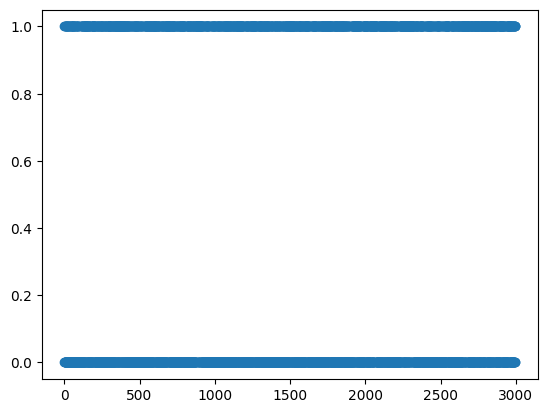

In [25]:
plt.scatter(np.arange(2996), y_preds)

### CONFUSION METRIX

In [26]:
from sklearn.metrics import confusion_matrix
conf_met = confusion_matrix(y_test, y_preds)
conf_met

array([[1517,   69],
       [ 171, 1239]])

<Axes: >

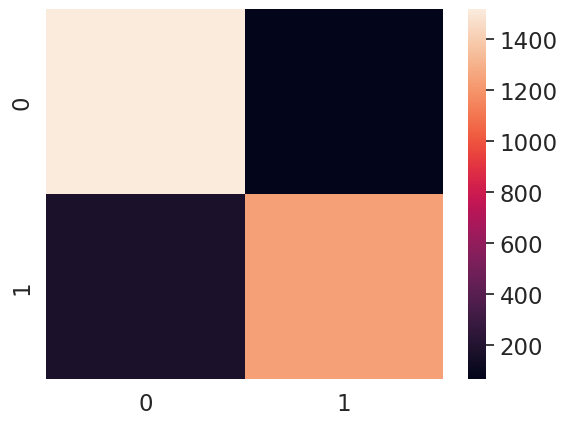

In [27]:
sns.set(font_scale=1.5)
sns.heatmap(conf_met)

### CLASSIFICATION REPORT

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1586
           1       0.95      0.88      0.91      1410

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



### Hyperpameter Tuning with GridSearchCV

In [29]:
grid = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [30]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

grid_search_clf = GridSearchCV(estimator=model,
                               param_grid=grid,
                               cv=2,
                               verbose=2)

grid_search_clf.fit(x_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, 

/home/mac/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mac/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mac/.local/lib/python3.8/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/mac/.local/lib/python3.8/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/mac/.local/lib/python3.8/site

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [31]:
grid_search_preds = grid_search_clf.predict(x_test)

In [32]:
accuracy_score(y_test, grid_search_preds)

0.9225634178905207